# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [78]:

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# importing machine learning models to be used from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer


# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,precision_recall_curve,roc_curve,make_scorer

# Code to ignore warnings from function usage
import warnings;
warnings.filterwarnings('ignore')

## Data Overview

- Observations
- Sanity checks

In [79]:
# Load the data
data = pd.read_csv('./data/ExtraaLearn.csv')
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [80]:
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [81]:
data.shape

(4612, 15)

- The dataset has 4612 rows and 15 columns

### Check the data types of the columns of the dataset

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

- It can be observed that they are no null values and also we have various datatypes (objects, integars and floating points)

### Check the number of unique values in each column

In [83]:
data.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

- It is observed that the `ID` column is unique for each row, hence we can drop it
- Also, it is observed that most colums are category columns except age, website_visits, time_spent_on_website, page_views_per_visit

### Dropping the unique values column

In [84]:
data.drop('ID', axis=1, inplace=True)

In [85]:
data.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


### Check the summary statistics


In [86]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


- The avarage age of the lead is 42.2 with standard deviation of 13.1 years, indicating diverse age range
- Website visit has some outliers at the right end as the 75th percentile value is 5 and the max value is 30, which could suggest that a small number of leads may be highly active on the website.
- time_spent_on_website  has some outliers at the right end as the 75th percentile value is 1336.75000 and the max value is 2537.000, over  2times, show casing variability in engagement levels.
- page_views_per_visit also has some outliers at the right end as the 75th percentile value is 3.75625 and the max value is 18.434, which could be indicative that while most leads view a few pages, some are much more exploratory.
- The target variable  - Status is imbalanced as most of the values are 0, this would addressed.




### Check count of each unique category in each of the categorical valriables\

In [87]:
# Making a list of all the categorical variables
cat_col = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral','status']

# print the unique value count for each column
for column in cat_col:
    print(data[column].value_counts())
    print('-- -' * 20)

current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
-- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- -
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
-- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- -
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
-- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- -
last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64
-- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- -
print_media_type1
No     4115
Yes     497
Name: count, dtype: int64
-- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- -
print_media_type2
No     4379
Yes     233
Name: count, dtype: int64
-- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --

- From the current_occupation it can be observed the minority leads are student with proffessional being the highest leads
- first_interaction: more leads interact with the website than the Mobile App.
- In comparison to the 4612 observations, they're very few leads from referrals, with educational_channels having the highest in the ratio of its reverse.
- It can also be observed that the leads interact/seek information about email activity majority of the times



In [88]:
# converting the data type of each category to 'category'
for column in cat_col:
    data[column] = data[column].astype('category')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   age                    4612 non-null   int64   
 1   current_occupation     4612 non-null   category
 2   first_interaction      4612 non-null   category
 3   profile_completed      4612 non-null   category
 4   website_visits         4612 non-null   int64   
 5   time_spent_on_website  4612 non-null   int64   
 6   page_views_per_visit   4612 non-null   float64 
 7   last_activity          4612 non-null   category
 8   print_media_type1      4612 non-null   category
 9   print_media_type2      4612 non-null   category
 10  digital_media          4612 non-null   category
 11  educational_channels   4612 non-null   category
 12  referral               4612 non-null   category
 13  status                 4612 non-null   category
dtypes: category(10), float64(1), int64(3)
me

In [89]:
# Duplicate the data to preserve original
df = data.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

### **Univariate Analysis**

We will define a `hist_box()` function which will be used to perform a univariate analysis on the columns of the dataset.

In [90]:
# Defining the hist_box() function that draws both the boxplot and histogram in the same visual
def plots(data, col):
    figure, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios':(0.15,0.85)}, figsize=(8,8))
    
    # Inputting the graphs
    if data[col].dtype == 'category':  
        sns.countplot(data=data, x=col)
        ax_box.set_visible(False) 
        plt.show()
        print(data[col].value_counts(normalize=True)) 
    else:
        sns.boxplot(data=data, x=col, ax=ax_box, showmeans=True)  
        sns.histplot(data=data, x=col, kde=True, ax=ax_hist) 
        plt.show()

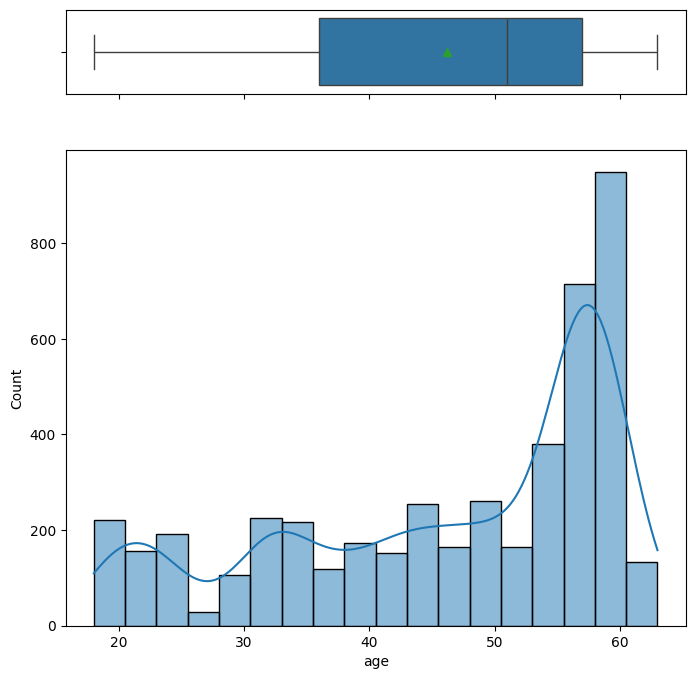

In [91]:
plots(df, 'age')

Observation: 
- The distribution is slightly left skewed suggesting there may be a smaller number of younger learners, potentially in their 20s or early 30s.
- Additionally, the presence of outliers on the higher end of the age range indicates that there may be some learners who are significantly older than the median age.
- It also suggests that the avrage age of leads is around 46

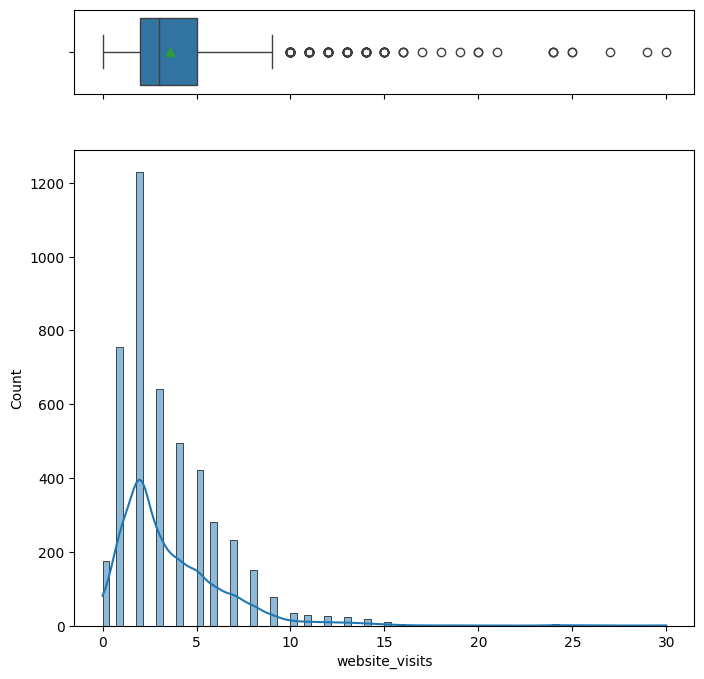

In [92]:
plots(df,'website_visits')


- The histogram for 'website_visits' shows the distribution of the number of website visits by leads. 
- It indicates that most leads have visited the website between 1 to 5 times, with a peak around 3 visits. 
- There are fewer leads with more than 5 visits, and a small number of outliers with a significantly higher number of visits.

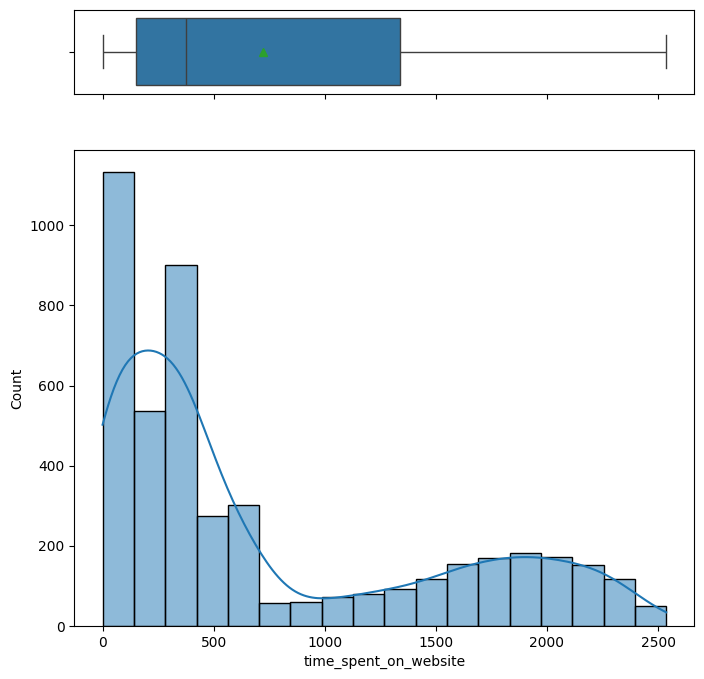

In [93]:
plots(df, 'time_spent_on_website')

- The boxplot at the top shows the median time spent on the website, which is around 376 seconds (6.27 minutes), 
- The histogram below the boxplot provides a more detailed view of the distribution, indicating that most learners have spent between 0 to 1000 seconds (16.67 minutes) on the website, with a peak around 150-200 seconds (2.5-3.33 minutes). 
- There are fewer learners who have spent more than 1000 seconds on the website, and a small number of outliers who have spent significantly more time, up to 2537 seconds (42.28 minutes).

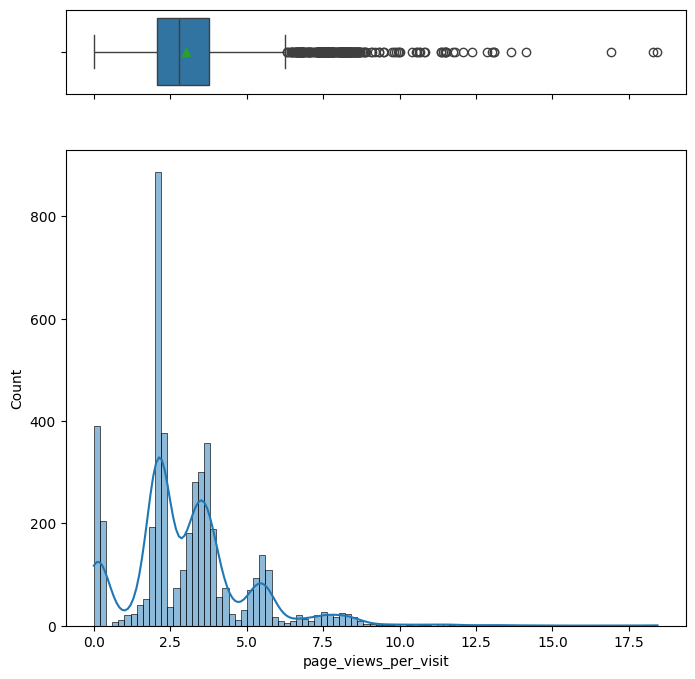

In [94]:
plots(df, 'page_views_per_visit')

- It indicates that most leads have viewed between 1 to 4 pages per visit, with a peak around 2-3 pages. 
- There are fewer leads who have viewed more than 4 pages per visit, and a small number of outliers who have viewed significantly more pages, up to 18 pages.

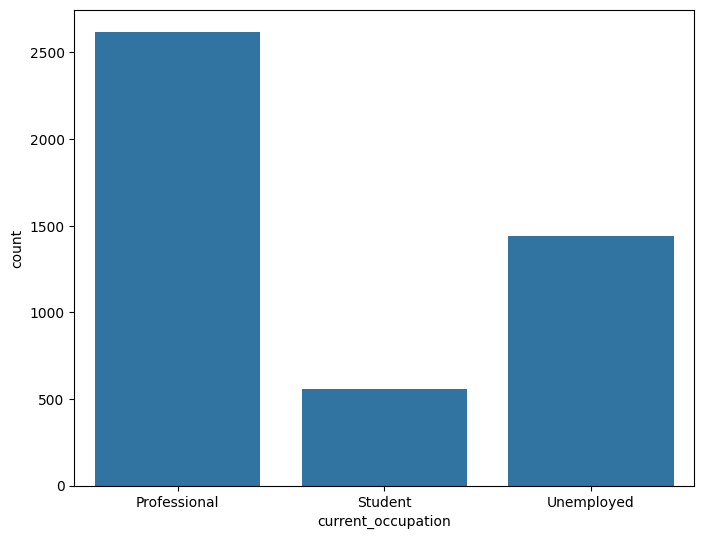

current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64


In [95]:
plots(df, 'current_occupation')

- It appears that the most current occupation are the professionals taking 56% of the leads and the leads from student are less than 20%
- This information can be useful in understanding the demographics of potential customers and tailoring marketing strategies accordingly.
    


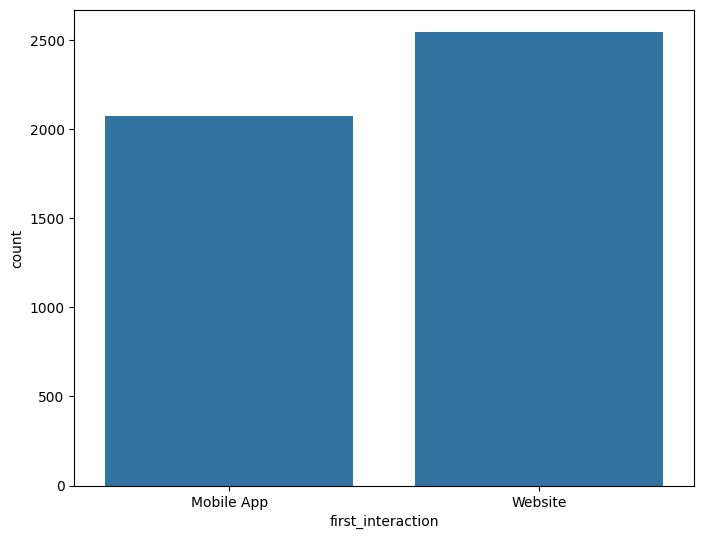

first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64


In [96]:
plots(df, 'first_interaction')

- It indicates that most leads (55%) first interacted with the website, while a smaller percentage (45%) first interacted with the mobile app.


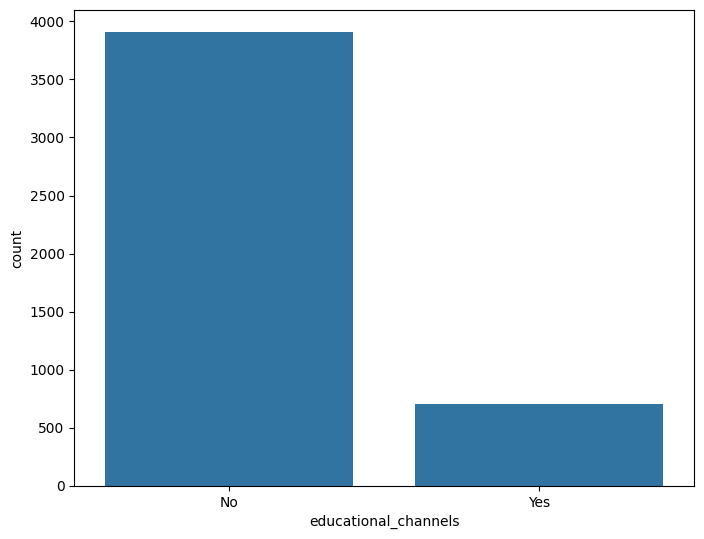

educational_channels
No     0.847138
Yes    0.152862
Name: proportion, dtype: float64


In [97]:
plots(df, 'educational_channels')

- 84% of leads have not heard about EduLearns on any eductional channel, which could be an opportunuity to try sucharea out

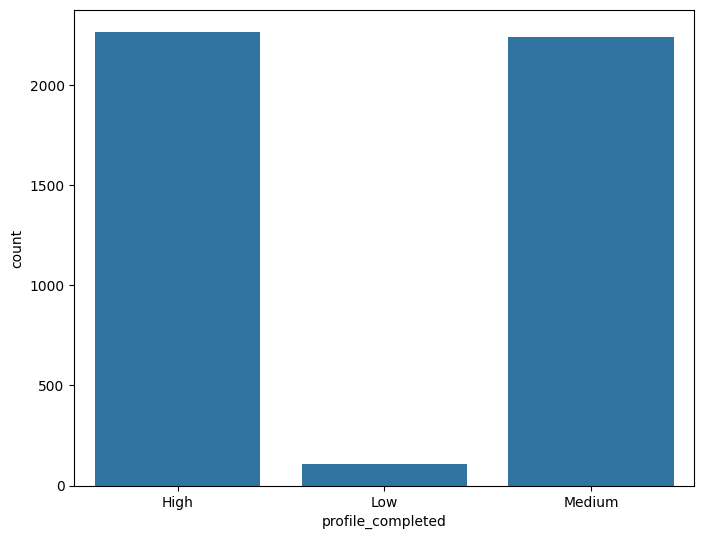

profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64


In [98]:
plots(df, 'profile_completed')

- It indicates that a significant majority of leads have completed their profiles, while a smaller percentage have not. 
- This information is crucial in understanding the level of engagement and potential conversion rates of leads.

### **Bivariate Analysis**

### Current Occupation and Lead Status: 

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   age                    4612 non-null   int64   
 1   current_occupation     4612 non-null   category
 2   first_interaction      4612 non-null   category
 3   profile_completed      4612 non-null   category
 4   website_visits         4612 non-null   int64   
 5   time_spent_on_website  4612 non-null   int64   
 6   page_views_per_visit   4612 non-null   float64 
 7   last_activity          4612 non-null   category
 8   print_media_type1      4612 non-null   category
 9   print_media_type2      4612 non-null   category
 10  digital_media          4612 non-null   category
 11  educational_channels   4612 non-null   category
 12  referral               4612 non-null   category
 13  status                 4612 non-null   category
dtypes: category(10), float64(1), int64(3)
me

In [100]:
df.head().T

,0,1,2,3,4
age,57,56,52,53,23
current_occupation,Unemployed,Professional,Professional,Unemployed,Student
first_interaction,Website,Mobile App,Website,Website,Website
profile_completed,High,Medium,Medium,High,High
website_visits,7,2,3,4,4
time_spent_on_website,1639,83,330,464,600
page_views_per_visit,1.861,0.32,0.074,2.057,16.914
last_activity,Website Activity,Website Activity,Website Activity,Website Activity,Email Activity
print_media_type1,Yes,No,No,No,No
print_media_type2,No,No,No,No,No


In [101]:
def stacked_plots(data, predictor, target, figsize=(11,5)):
    (pd.crosstab(data[predictor],data[target],normalize='index')*100).plot(kind='bar',figsize=figsize,stacked=True)
    plt.legend(loc="lower right")
    plt.ylabel(target)

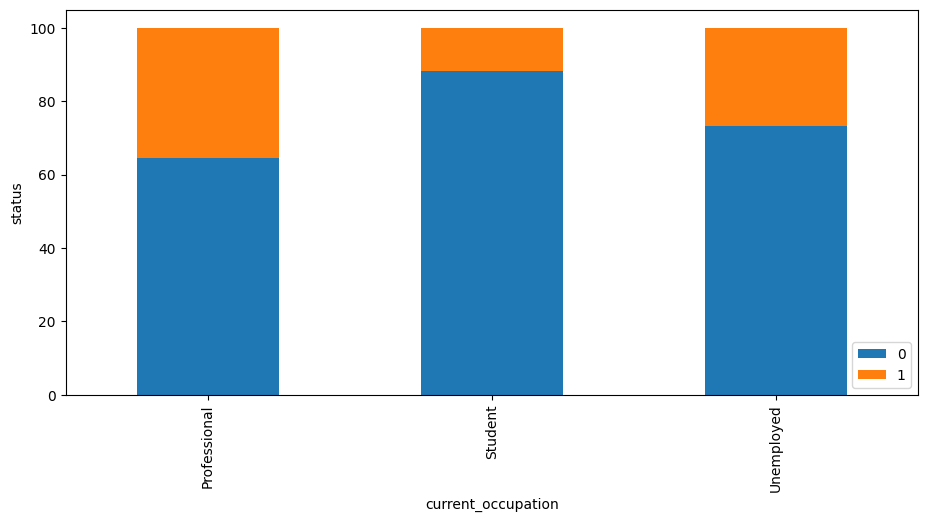

In [102]:
stacked_plots(df, 'current_occupation', 'status')

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information. Does having more details about a prospect increase the chances of conversion?

**Question 1**
 - The student category shows left percentage to being converted to leads and this shows that students are less likely to conveert to paying customers probably due to financial constrainst.
 - Unemployed category presents as the second higher percentage to not become paying customers as students
 - Professional category are the hight notable categopry to become paying customers even though there is a noptable poercentage that did not become paying custimers

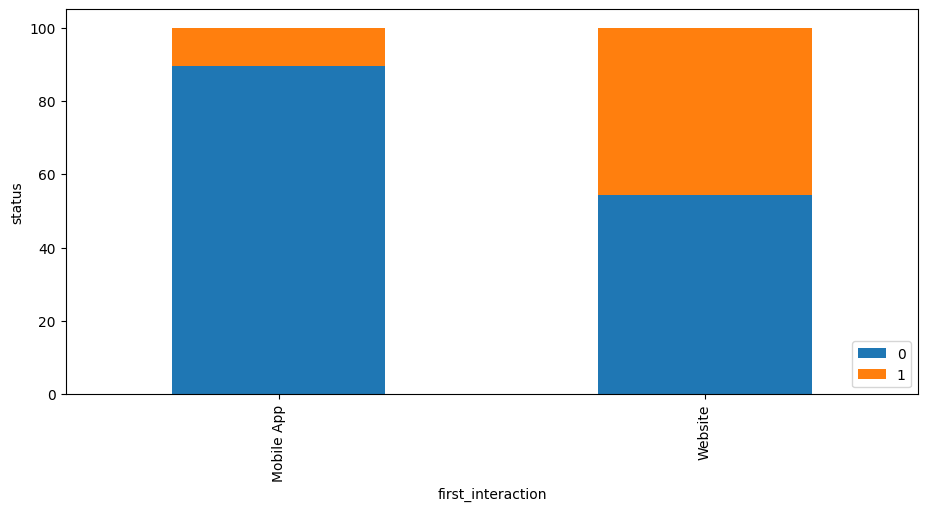

In [103]:
stacked_plots(df, 'first_interaction', 'status')

**Question 2 and 3**

- From the diagram, both channels do have an impact but it is seen that the Website interaction has the highest conversion rate, followed by Mobile App. This suggests that the first impression through the website has a greater positive impact on the lead status, increasing the chances of conversion compared to the mobile app


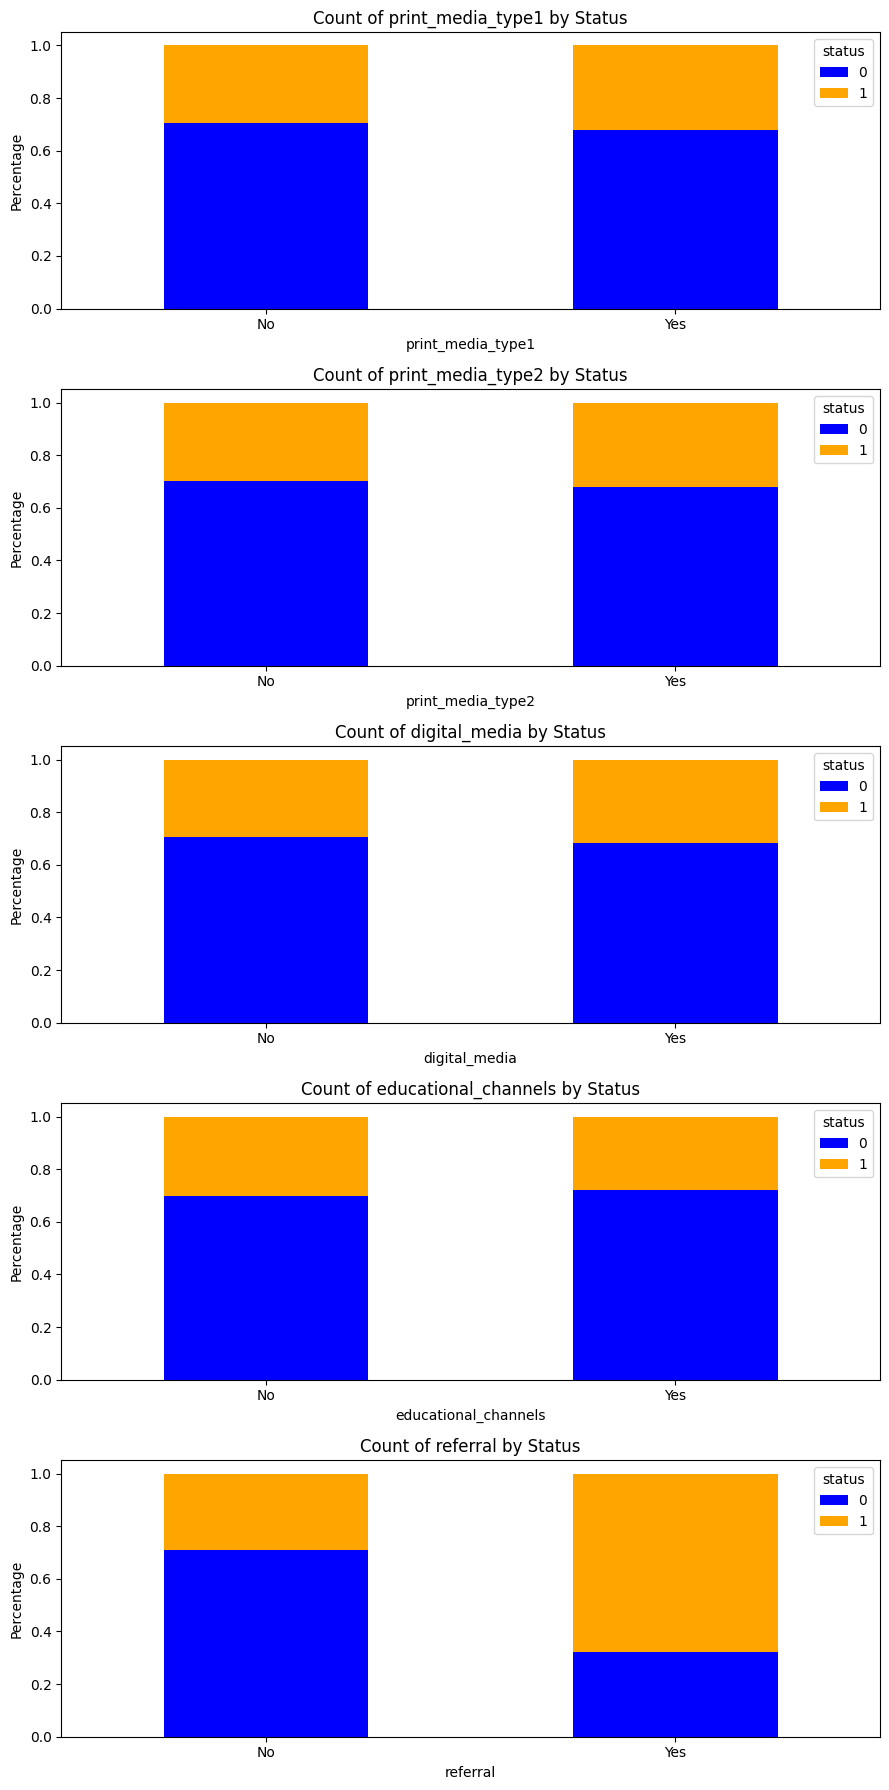

In [104]:
media_types = [  
    'print_media_type1', 
    'print_media_type2', 
    'digital_media', 
    'educational_channels', 
    'referral']

plt.figure(figsize=(9, 18))

for i, media in enumerate(media_types):
    plt.subplot(len(media_types), 1, i + 1)
    pd.crosstab(df[media], df['status'], normalize='index').plot(kind='bar', stacked=True, color=['blue', 'orange'], ax=plt.gca())
    plt.title(f'Count of {media} by Status')
    plt.xlabel(media)
    plt.ylabel('Percentage')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

**Question 4**
- **Referral** has the highest lead conversion rate among the media shown in the charts. The proportion of leads that converted (orange) is greater compared to the other channels, suggesting that referrals are more effective in converting leads. 

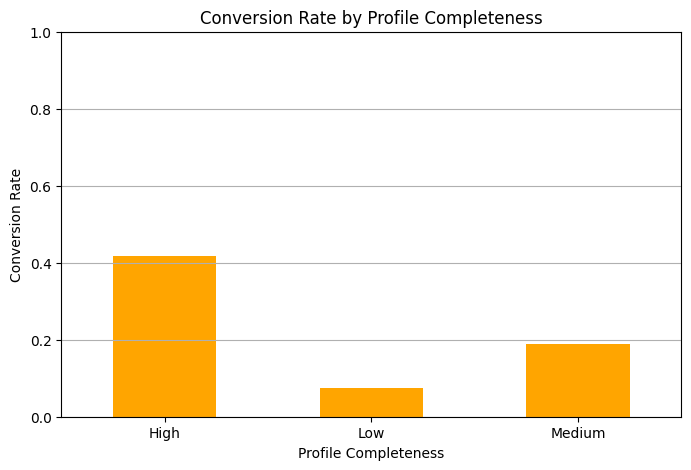

In [105]:
# Calculate conversion rates
conversion_rates = df.groupby('profile_completed')['status'].value_counts(normalize=True).unstack().fillna(0)
conversion_rates['conversion_rate'] = conversion_rates[1] 

# Plotting the conversion rates
plt.figure(figsize=(8, 5))
conversion_rates['conversion_rate'].plot(kind='bar', color='orange')
plt.title('Conversion Rate by Profile Completeness')
plt.xlabel('Profile Completeness')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()



**Question 5**
- This suggests that leads with a high level of profile completeness are significantly more likely to convert 

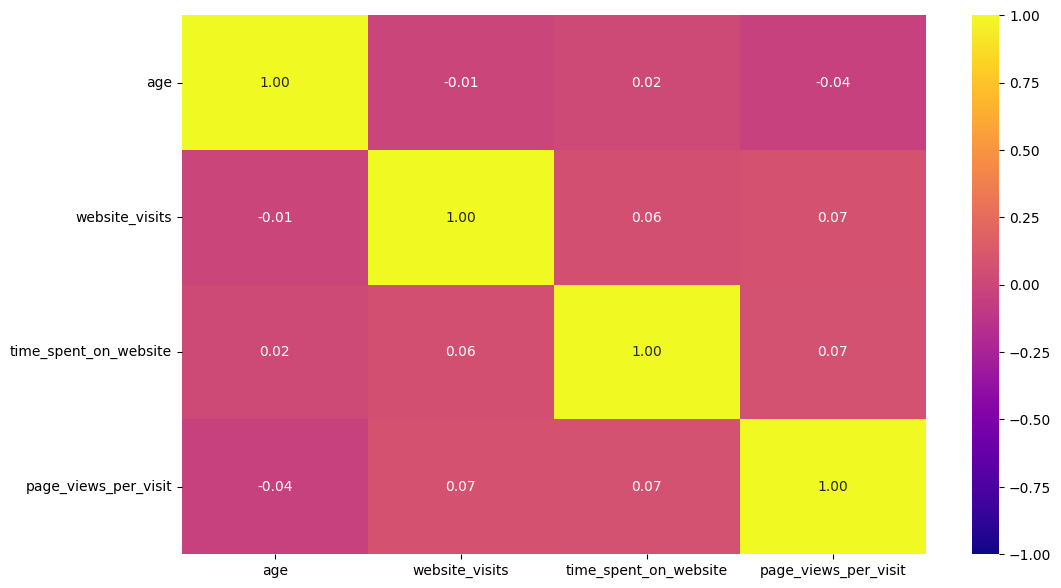

In [106]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="plasma")
plt.show()

- The time spent on the website has a weak correlation with the page-view-per-visit which is understandable cause once with the number of time an individual sends on the website is is aonly reasonable the individual visits more pages
- Also age and time-spent-on-website have  positive correlation, cause it is expcted the older you get, the more time you'll spend learning and have more access to the internet.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

## EDA

- It is a good idea to explore the data once again after manipulating it.

## Building a Decision Tree model

## Do we need to prune the tree?

## Building a Random Forest model

## Do we need to prune the tree?

## Actionable Insights and Recommendations